# 10 マーケティングにおける消費者分析とCRMの中級編

＜章トビラ＞

本章では、マーケティングに関する分析について、初級編よりも少し高度なアプローチを学びます。この講義では、顧客により良いサービス・商品を提案したり、そのための企業施策を効率的に実行・検証し、さらにその施策検証結果やKPIなどのレポーティングを自動化していくことを目標にしています。将来的に、マーケティングを自動化するシステムを構築するのに役立つツール群を紹介していきます。

初級編では顧客をセグメントし、それぞれの顧客層に応じた施策実施の必要性を記述しました。本中級編では、施策として顧客に買ってもらえそうなサービスを提案するための「リコメンデーション（推薦システム）」、企業の実施した施策がよかったのか悪かったのか判断するための「因果推論・分析」、そして施策や企画に関する結果やKPIのトラッキングとそれらの定期的な分析レポーティング作成と共有、メール自動配信、Slack等への自動通知を実現するための「自動化処理」について学んでいきます。

それぞれ深い分野であり、本章だけで全てカバーすることは難しいですが、本講義の初級編で学んだ顧客へのマーケティング戦略からはじまり、その消費者の基本分析、セグメンテーションとターゲティング、その顧客への施策と検証、それらを自動化してレポーティングするまでの基本的な流れを、一気通貫してイメージできるようになるでしょう。実務でそれぞれ本格的に必要になったら、後ほど紹介する参考文献等を見るなどして、取り組んでみてください。

<ゴール>  

マーケティングの高度なアプローチ（リコメンド、因果推論、分析レポート自動化処理）について理解し、それぞれ基本的な実装ができ、マーケティングのPDCAサイクルをまわすための仕組み、基本的なシステム設計ができる

<前提知識とスキル>  
・東京大学松尾研究室が提供している以下のコンテンツを理解して、実装できること

https://weblab.t.u-tokyo.ac.jp/gci_contents/

＝＞具体的には、Pythonの基礎的な処理、Numpy、Pandas、Matplotlibを使いこなせるようになっていることと機械学習のSklearnの基本的な使い方がわかっていること

・マーケティングにおける消費者分析とCRMの初級編を一通り理解して実装できること

***

## 10.1 本章を学ぶ背景と全体像

キーワード：リコメンデーション、因果推論、マーケティングシステム自動化

### 10.1.1 顧客への提案、施策検証、自動化に向けて
消費者分析の初級編では、基本的な顧客行動の分析とCRMの一部であるPOSデータの基本的な扱い方について解説しました。これまでは、データ分析の基本的な型を身に付けるという意味で、基礎集計したり、必要があればローデータを見たり、マーケティングにおけるデータ分析の顧客を識別（セグメント）する様々な方法と、その活用方法を述べてきました。そして次に考えていくべきことは、

「その顧客セグメントにどんな商品やサービスを提供、提案したらよいのだろうか」

「施策の効果があったのかなかったのかROIを含めてしっかりと把握していきたい」

「そういった施策のKPIトラッキングレポートを手作業でやるのではなく、なるべく自動化していきたい」

など、顧客に対してより具体的な施策、アクションやその施策の測定、レポートを作成していくことになります。

それぞれ以下に該当し、この講義ではそれぞれのポイントを解説していきます。

1.   リコメンデーション（推薦システム）
2.   施策の効果検証(Test&Learnなどといわれたりもします。)
3.   そのBIツール作成やレポーティング自動化

初級編で実践した通り、データ分析ではかなり愚直にデータを見ることもあり地道な作業も多いですが、もちろんそういう作業を永遠にやりたいわけではありません。顧客への最適な「アルゴリズム自動マーケティングエコシステム」を構築して、システムが処理できることはシステムに任せて、創造的な仕事や人間にしかできない仕事をする時間を増やしていきましょう。その自動化のためのアプローチやツールを、この章では学んでいきます。

補足：なおマーケティングの自動化ツールとしては、MA（マーケティングオートメーション）としてMarketoなど様々なソリューションがあり、様々な企業で使われるようになっています。一方、それらのツールを使いこなせず、ただ導入しただけというケースもよく耳にします。こういったツールはあくまでツールのため万能ではなく、どういったシナリオで顧客へのサービス向上に繋がるのか、どうすれば運用コストを下げるかなど、目的をはっきりさせてから、導入するのが良いでしょう。

### 10.1.2 本章で主に使うライブラリ等

以下、本章で必要なライブラリ等をインポートしておきます。また、別途使うライブラリについては、必要があれば都度インポートしていきます。

In [ ]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import pandas as pd

import datetime

# 可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第3位まで表示
%precision 3

'%.3f'

## 10.2 リコメンデーション

キーワード：協調フィルタリング、コンテンツベースフィルタリング、SVD、ボルツマンマシン、強化学習

### 10.2.1 この節で学ぶこと



現代は情報多過の時代だと言われ、顧客は選択肢がたくさんある一方で、どの商品やサービスを選んだらよいのかわからないこともあります。一方、企業として顧客に何か商品を提案するときに、単にランキング上位に入った商品だけを薦めるだけでは、その顧客にあった商品を提案できないですし、ニッチな商品を売る機会も減ってしまいます。オススメ商品の表示については、AmazonやNetflex、YouTubeなどの有名なサービスで使われているので、このリコメンドのイメージを持っている方は多いと思います。この節では、顧客に何をリコメンドしたら良いのかアプローチするためのアルゴリズムについて学んでいきましょう。

補足：ちなみに、顧客が自分の探したい商品がはっきりわかっている場合は「検索」をすれば良い一方、リコメンデーションは、顧客が言語化できていないが潜在的なニーズがある場合に使われます。（この検索のようにユーザーが意図を持っている時に推薦する場合を「プルモデル」、意図を持っていない場合に推薦する場合を「プッシュモデル」といいます。）

リコメンデーションのシステムは、主に顧客の商品に対する評価や顧客の購買履歴（POSデータ）などによって計算されます。リコメンデーションの種類については、色々と分け方はありますが、主に3つのアプローチがあります。似ている顧客を探すアプローチ（協調フィルタリング）、商品が似ているものでのアプローチ（コンテンツベース）、その文脈（コンテキスト）でのアプローチです。前者2つはある程度イメージできますが、3つ目は例えば、同じ顧客でも季節によって買う商品が異なる傾向にあるため、その文脈は季節になります。



*   協調フィルタリング：似ている人たちによるリコメンド
*   内容ベースフィルタリング：商品の内容によるリコメンド
*   コンテキストベースフィルタリング：顧客の置かれている環境（場所、時間、時期、チャネル、条件など）によるリコメンド

この説では、リコメンドエンジンとしてよく使われる1つ目の「協調フィルタリング」について、主にPython実装を紹介していきます。なお、このリコメンドの種類やそれらのロジックについて、もっと詳細に知りたい方は、以下の参考文献をみてください

参考文献


*   『AIアルゴリズムマーケティング　自動化のための機械学習/経済モデル、ベストプラクティス、アーキテクチャ』（インプレス）
*   『推薦システム』（共立出版）
*   『情報推薦システム入門』（共立出版）


なお、推薦システムについては、以下の一般公開されている資料がとても参考になります。

参考URL

推薦システムのアルゴリズム（Toshihiro Kamishima先生）



* https://www.kamishima.net/archive/recsysdoc.pdf

* https://www.kamishima.net/archive/recsys.pdf


### 10.2.2 協調フィルタリング



ここからは、協調フィルタリングのPython実装を紹介していきます。上記で協調フィルタリングとは、似ている人たちによるリコメンドだと解説しました。いいかえると、ターゲットとなる顧客の趣味嗜好に類似している別の顧客を探し出して、そのターゲット顧客の嗜好に基づいて、オススメを行う方法になります。この方法は色々な企業のリコメンデーションシステムでよく採用されています。

そのアルゴリズム構築を実現するため、ここではscikit-surpiseというパッケージを使ってみます。以下でインストールを実行します。

参考：scikit-surpiseパッケージの公式サイト

http://surpriselib.com/

https://surprise.readthedocs.io/en/stable/index.html#

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 3.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619396 sha256=f989e54ee8b5a2d7b0ccada9f73dc23b3e72ef834bed48b18b2ea61d7ba1253a
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


次に、この協調フィルタリングのアルゴリズムを実装、検証するためのライブラリ等をインポートします。SVDは、特異値分解という推薦のシステムでよく紹介されるアルゴリズムを使います。cross_validateは機械学習のモデル評価でよく使われるライブラリで、クロスバリデーションをするためにインポートします。

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import Dataset

最後のDatasetは、ここで使うデータをインポートするためで、ユーザーのそれぞれの映画に対する評価データです。Do you want to download it? [Y/n] と聞かれるので、Yを入力してEnterし、movielens-100kのデータセットをロードします。

In [ ]:
movie_dataset = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


このデータセットについては以下に記載があります。100kは10万レコードになります。

参考URL：

https://grouplens.org/datasets/movielens/

https://surprise.readthedocs.io/en/stable/dataset.html

raw_ratingsでデータにアクセスでき、以下からraw_ratingsはリスト型のデータで、要素はタプル型でデータが1つ1つ入っているのがわかります。

In [ ]:
type(movie_dataset.raw_ratings)

list

左から順に、ユーザーID、評価した映画ID、その映画の評価(Rating)、その時のタイムスタンプというデータになります。タプル1つ分が1ユーザーの1商品評価になります。

In [ ]:
movie_dataset.raw_ratings[0:10]

[('196', '242', 3.000, '881250949'),
 ('186', '302', 3.000, '891717742'),
 ('22', '377', 1.000, '878887116'),
 ('244', '51', 2.000, '880606923'),
 ('166', '346', 1.000, '886397596'),
 ('298', '474', 4.000, '884182806'),
 ('115', '265', 2.000, '881171488'),
 ('253', '465', 5.000, '891628467'),
 ('305', '451', 3.000, '886324817'),
 ('6', '86', 3.000, '883603013')]

pandasのDataFrameで扱いたい人は以下のように変換できます。

In [ ]:
movie_df = pd.DataFrame(movie_dataset.raw_ratings,columns=['user_id', 'product_id','rating','timestamp'])
movie_df.head()

,user_id,product_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


ただ、一番右のタイムスタンプがこのままでは日時がわからないので、わかりやすい日時型に変更しましょう。pandasの日時の型に変換するto_datetimeの引数のunitのsはsecondの略で秒単位になります。

In [ ]:
movie_df['timestamp'] = pd.to_datetime(movie_df.timestamp.astype(int), unit='s')

In [ ]:
movie_df.head()

,user_id,product_id,rating,timestamp
0,196,242,3.0,1997-12-04 15:55:49
1,186,302,3.0,1998-04-04 19:22:22
2,22,377,1.0,1997-11-07 07:18:36
3,244,51,2.0,1997-11-27 05:02:03
4,166,346,1.0,1998-02-02 05:33:16


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     100000 non-null  object        
 1   product_id  100000 non-null  object        
 2   rating      100000 non-null  float64       
 3   timestamp   100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.1+ MB


上よりtimestampは適切にdate型に変換されているのがわかります。また、infoによってデータが10万行あることも確認できます。さて、ここでの目的は、このデータを使って、推薦アルゴリズムを構築することですが、その前にこのデータについて簡単に集計をしてみます。以下から評価したユーザーは943人、プロダクトの数は1682作品あるのがわかりますし、作品によってその平均評価が異なることがわかります。

In [ ]:
movie_df.user_id.nunique()

943

In [ ]:
movie_df.product_id.nunique()

1682

In [ ]:
movie_df.groupby(["product_id"])["rating"].mean().sort_values()

product_id
1408    1.0
1671    1.0
1557    1.0
599     1.0
1678    1.0
       ... 
1201    5.0
1293    5.0
1467    5.0
1653    5.0
1122    5.0
Name: rating, Length: 1682, dtype: float64

1人でどれくらいの作品を評価しているでしょうか。以下から、このデータは1人あたり20作品から737作品評価する人がいたようです。

In [ ]:
movie_df.groupby(["user_id"])["product_id"].nunique().sort_values(ascending=False)

user_id
405    737
655    685
13     636
450    540
276    518
      ... 
824     20
202     20
418     20
19      20
143     20
Name: product_id, Length: 943, dtype: int64

次に、この推薦アルゴリズムを構築する時は、ユーザーIDごとにそれぞれの映画の評価がどうなのか2次元の表（行列の形）にすることが多く、表の作成は以下のような実装になります。（pandasのpivot_tableを使います。）

In [ ]:
movie_df.pivot_table(index='user_id',columns='product_id',values='rating')

product_id,1,10,100,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,101,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,102,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,103,1030,1031,1032,1033,...,963,964,965,966,967,968,969,97,970,971,972,973,974,975,976,977,978,979,98,980,981,982,983,984,985,986,987,988,989,99,990,991,992,993,994,995,996,997,998,999
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


上記の表を見るとわかる通り、こういうデータは商品の種類数は多く、ユーザーは一部の商品しか評価していないため、かなり欠損のあるデータ（スパースデータ）になります。ユーザーが943人、商品が1682個あるため、厳密には943 * 1682 = 1,586,126個評価が必要ですが、ほとんど評価されていないデータになります。

さて、このデータをどのように使って推薦システムを構築するかですが、まずこのデータの目的変数は評価（rating）になり、それを検証するモデルを構築したいと思います。アプローチの仕方は機械学習で学んだ検証方法と同じイメージになります。つまり、データを訓練データ（と検証データ）とテストデータに分けて、訓練データでアルゴリズムを構築し、テストデータでその評価していきます。

ここでは、SVD（特異値分解）という推薦のシステムでよく紹介されるアルゴリズムを使います。これは協調フィルタリングのアプローチになります（まずこの講義では、使い方を理解することを重視しているため、計算式の細かいロジックや正確な定義についてはここでは述べませんが、興味ある方は参考文献をみてください。）

モデルの評価は、クロスバリデーションでcv=5で実行しています。計測は、RMSEとMAEなど使えますが、わかりやすさを重視するため、RMSEだけセットします。
（こちらの用語になじみのない方は、松尾研究室提供のデータサイエンス講義の機械学習のチューニング章のコンテンツをみてください。）

・MSE (Mean Squared Error)：平均二乗誤差
＝＞予測値と実測値の差を二乗した値の平均値

・RMSE（Root Mean Squared Error）
＝＞MSEの平方根

・MAE（Mean Abusolute Error）：平均絶対誤差
＝＞予測値と実測値の差の絶対値を算出し、平均したものになります

以下でSVDのモデルを使うことを実装しています。

In [ ]:
algo = SVD()

そして、次にcross_validateを使います。この引数として、使うアルゴリズム、対象データセット、評価指標、CVの数、計算ステップごとに出力するかどうかFlgを設定します。以下の実行は、少し時間がかかりますので注意してください。（そして、先ほど変換したDataFrameを使わず、そのままDatasetで読み込んだ、movie_datasetを入れるので注意してください。）

In [ ]:
cross_validate(algo, movie_dataset, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9394  0.9350  0.9399  0.9332  0.9318  0.9359  0.0033  
Fit time          4.80    4.80    4.76    4.78    4.74    4.78    0.03    
Test time         0.20    0.26    0.16    0.24    0.18    0.21    0.04    


{'fit_time': (4.802, 4.801, 4.764, 4.785, 4.735),
 'test_rmse': array([0.939, 0.935, 0.94 , 0.933, 0.932]),
 'test_time': (0.202, 0.263, 0.163, 0.237, 0.177)}

上記の結果より、SVDのRMSEの平均は約0.93という数値が出ています。さて、この結果だけみても、このSVDモデルがいいのかどうか判断がつきません。それはもともとの比較対象がないためで、初級編でも述べた通り、分析の基本は「比較」にあります。そこで一旦ランダムなモデルを構築しそれをベースに結果比較してみることにしましょう（もし誰かオリジナルなアルゴリズムを構築してリコメンドしている場合は、それが比較対象になります）。

以下のNormalPredictorは、ランダムなモデルの結果になります。先ほどのSVDのRMSEは約0.93でしたが、NormalPredictorのRMSEは約1.5になっており、SVDの方が良いという結果になっているのがわかります（これらの指標は予測値と実績値の誤差を計算しているため、なるべく0に近い結果が良いモデルになります）。なお、NormalPredictorが直接エンジンに使われることはないですが、このようにモデルの「比較対象」としては使われることがありますので、推薦システムとして何も比べるモデルがない場合などに使ってください。

In [ ]:
from surprise import NormalPredictor
algo = NormalPredictor()
cross_validate(algo, movie_dataset, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5170  1.5070  1.5295  1.5199  1.5152  1.5177  0.0073  
Fit time          0.18    0.18    0.17    0.19    0.18    0.18    0.01    
Test time         0.23    0.16    0.16    0.24    0.16    0.19    0.04    


{'fit_time': (0.180, 0.185, 0.169, 0.186, 0.176),
 'test_rmse': array([1.517, 1.507, 1.53 , 1.52 , 1.515]),
 'test_time': (0.230, 0.158, 0.161, 0.244, 0.161)}

他のアルゴリズムとしては、以下の参考サイトがありますので、次の練習問題でやってみましょう。

https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

#### 練習問題
1.   上記のデータに対して、異なるモデルで推薦アルゴリズムを構築して、評価してみましょう。また、RSMEだけではなく、他の評価指標も使ってみましょう。

#### 解答

以下のNMF（非負値行列因子分解）も行列分解ベースで、ここではそのアルゴリズムを使っています。SVDより若干悪くなっています。

In [ ]:
from surprise import NMF
algo = NMF()
cross_validate(algo, movie_dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9633  0.9560  0.9640  0.9680  0.9617  0.9626  0.0039  
MAE (testset)     0.7579  0.7521  0.7550  0.7616  0.7561  0.7565  0.0031  
Fit time          5.61    5.49    5.59    5.56    5.57    5.56    0.04    
Test time         0.23    0.14    0.22    0.13    0.23    0.19    0.04    


{'fit_time': (5.611, 5.492, 5.585, 5.558, 5.574),
 'test_mae': array([0.758, 0.752, 0.755, 0.762, 0.756]),
 'test_rmse': array([0.963, 0.956, 0.964, 0.968, 0.962]),
 'test_time': (0.228, 0.145, 0.217, 0.134, 0.232)}

### 10.2.3 コンテンツベースフィルタリング

次は、商品（コンテンツ）をベースにした推薦システムです。この方法は具体的には、Aというブランドの国産ビールを購入したお客さんには、同じ国産カテゴリービール商品で異なるブランドBをリコメンドするというアプローチです。商品の内容がベースになるため、ある程度人でも簡単にリコメンドできるようなアルゴリズムになることも多く、実務では協調フィルタリングほど使われていません。上のsurprizeパッケージも今のところコンテンツベースフィリタリングのリコメンドはサポートしていないようです。

参考：http://surpriselib.com/

なお、このコンテンツをベースにした方法は、ユーザーに依存しないので、ユーザーが少ない場合や商品の評価が少ない場合に使えます。

### 10.2.4 ハイブリッド手法や深層学習、強化学習を用いたリコメンデーション




これまでリコメンドの種類として、協調フィルタリングをメインに、コンテンツベースのリコメンド、コンテキストを使ったリコメンドがあると簡単に解説をしましたが、それぞれの欠点を補うために、それらを組み合わせたしたハイブリッドな手法があります。他、アソシエーションルールに基づくリコメンド（松尾研究室提供のデータサイエンス講義の教師なしで扱いました）などもあります。

さらにリコメンドのハイレベルな手法として、深層学習の分野であるボルツマンマシンを使った推薦システム（協調フィルタリング）がありますし、強化学習を使ったアプローチもあります。リコメンドは「活用と探索」をしながら、改善をする必要があります。ここでいう「活用」とは今まで学習したモデルで最適と判断した商品があり、それをリコメンドするということを実行する一方、「探索」とはそのモデルで最適と判断した商品をリコメンドせず、別の商品をリコメンドすることを意味して、これは強化学習のアプローチになります。これらはハイレベルな方法なため、この講義では扱いませんが、興味ある方は以下の参考文献などをみてください。

参考：

『Pythonではじめる教師なし学習』（オライリー）

・推薦システムへの強化学習の適用（WSDM 2019）

https://research.google/pubs/pub47647/


リコメンドの種類について基本的な解説はこれで終わりになります。なお、それぞれのリコメンドの方法にはメリットやデメリットがあり、例えば、協調フィルタリングは、様々な企業でよく使われるほどある程度高い効果が期待できるメリットがある一方、新しい商品がリコメンドされないこと（誰も買っていないので、データないため）や、新しい顧客（こちらも何も買ってないので、データがないため）へのリコメンドの精度が悪くなりがちなどのデメリットがあります。そこで、より良い商品やサービスを顧客へ提案するために、上記のハイブリットなアプローチや、深層学習、強化学習を使った方法の研究や開発も盛んにされています。

各ビジネス状況や、ビジネスモデル、マーケティングの戦略、データ状況に応じて使い分ける必要があると思いますので、上記の参考文献などを使いながら学習を進めて、実務で使う場面がでてきたら、適材適所で使い分けて活用していってください。

### 10.2.5 リコメンドの検証方法とは

この節の最後として、リコメンド検証方法について少し述べます。リコメンデーションのモデルを構築した後は、そのリコメンドのロジックを実際にサービスシステムに組み込み（もしくは直接の推薦）、それが効果があったのか検証作業をする必要があります。

何かの商品やサービスについてキャンペーンWEBページを構築したなら、その広告がユーザーに表示されたかどうか、それをユーザーがクリックしたかどうか、無料体験など申し込みをしたかどうか、最終的に購買したかどうかそれぞれデータを取る必要があります。（Amazonのサイトなら、そのユーザーに表示された商品、クリックした商品、購入した商品、コメントした商品などデータとして蓄積されているはずです。）

ただ、このリコメンデーションの検証について、その追うべき数値は1つだけではありません。例えばその指標が、ウェブクリック率なのか、SNSなどでシェアをされる割合なのか、ちゃんとコンバージョンされることなのかなど、目的は様々にあります。また別の例として、AかBの商品どちらかをリコメンドする場合、Aが購買予測確率90%でBが85%ならば、Aをリコメンドした方がいいという判断もあれば、実はBの利益率はAよりも高い場合は、Bをリコメンドした方がいいという判断もあります。つまり、リコメンデーションとしては、多目的最適化をしていく必要も出てきます。

このようにリコメンデーションの検証アプローチは、そのリコメンドの目的やロジックなどにもよりますが、よく使われている手法がA/Bテストになります。このA/Bテストもリコメンデーションの検証アプローチであり、良い方を採用していく方法で、広い意味で言うと施策検証の1つになります。次の節では、そのA/Bテストも含め、その施策の検証方法について紹介していきます。さらにウェブ施策だけではない、より汎用的なアプローチとしての施策効果検証方法を学んでいきましょう。

## 10.3 施策の効果検証

キーワード：因果推論と分析、EBPM、テスト群とコントロール群、RCT、A/Bテスト、Wilcoxon(ウィルコクソン)の順位和検定、セレクションバイアス、共変量、介入変数、回帰分析

### 10.3.1 施策効果検証の正しいアプローチとは

この節では施策の効果検証について、いくつかのアプローチを紹介します。施策には、政策に関する施策、教育に関する施策など様々なものがあります。昨今は
「EBPM：Evidence-Based Policy Making (エビデンスに基づく政策形成)」というキーワードが注目されており、これもデータに基づく意思決定アプローチになります。本節では、主にマーケティングに関する施策の効果検証について見ていきます。企業のマーケティング戦略に沿ったビジネス目標（利益など）を最大化するために、そのためのビジネスアクション（変数）の戦略をどうするか、効果が高い施策を選び、効果のない施策はすぐにやめる、それらを素早く判断してくことは、非常に重要なことです。無駄な施策を減らし、その成功確度を上げていくためには、施策検証方法が頑健であることが必要になります。

本講義の初級編では顧客を識別し、優良顧客をセグメントする方法を学び、各顧客セグメントに施策を実施する重要性について解説をしました。そして、前節ではリコメンデーションも紹介し、これも施策の一種になります。次に問題になってくるのが、「その施策が本当に効果があったのか、なかったのか」ということです。この検証方法はどうすれば実行できるのでしょうか。それは、初級編の冒頭で、分析で重要なことで述べた「比較する」ことになります。ただ、比較するといっても、その比較対象が重要になってきます。比較の仕方にも様々あり、例えば、施策実施前の売上と施策実施後の売上を比較したり、施策を実施した顧客と施策を実施しない顧客の売上比較をすることも考えられるでしょう。これらの2つのアプローチは簡単であるがゆえに、よく実施される傾向にありますが、実はその施策効果を見誤る可能性もあります。

#### 練習問題


1.   なぜ単純に施策実施前と施策実施後の売り上げ比較が問題なのか考えてみましょう。
2.   なぜ単純に施策実施した顧客と実施しなかった顧客の売上比較に問題があるのか考えてみましょう。
3.   どうやれば正確な比較ができるか考えてみましょう。

（なお、以下に解説があるので、まずは一旦ここで考えてみてください。）


まず、1つ目のアプローチの施策前後比較のどこに問題があるのか考えてみましょう。施策の前後に様々な要因が入り込むため、その施策自体に効果があったのか、正確にはわかりにくくなることがあります。極端な例でいうと、ECサイトか何かで2019年10-12月にマスクを売るためのキャンペーン施策を実施したとしましょう。その前後比較をすると、施策後に圧倒的に売上が上がっているのが想像できると思いますが、これをキャンペーンの効果と言ってよいのかということです。ご想像の通り、キャンペーンの要因以外にも、冬になるので季節性でマスクの売上がもともと上がる傾向であったということと、さらに2020年1-2月頃からコロナウイルスが広がったため、マスクの売上が増えたという点があげられます。この例はとても極端なので、その比較はおかしいとすぐ気付くことができますが、このように他の要因がいろいろとあるため、施策自体の効果がわかりにくくなります。

そして次に、2つ目のアプローチの施策を実施した顧客としなかった顧客の比較の問題点について考えてみましょう。初級編でデシル分析を行ったので、セグメントにクーポンを配布する施策を実施したとしましょう。ここでは、クーポンをセグメント10に配布することを考えます。さて、このクーポン施策の効果をどう検証すればよいでしょうか。セグメント10の施策前後の売上比較は、上の問題がありましたが、他のセグメント（1-9）の人たちと比較するのも問題があります。それは、セグメント10の人たちはもともと購買意欲が高い人たちで、その他のセグメントの人たちとAppletoAppleになってないからです。セグメント10の人たちはクーポンを配布しなくてももともと購買する傾向にあったので、それを他の購買しないセグメントと比較しても正しい比較ではないからです。つまり、その施策で効果があったのではなく、こちらも別の因子が働いていたからになります。これも先ほどと同じような問題点になります。

では、どのように比較をすればよいのでしょうか。いくつかアプローチがありますが、まずApple to Appleにするために、理想的な比較対象を決めることです。初級編でも少し触れた、同じ購買力を持つセグメントに対して施策をするテストグループ（処置群ともいいます）と、テストしないコントロールグループ（対照群ともいいます）に分けて検証するというアプローチです。これは、RCT（Randomized Controlled Trial）というランダム化比較試験という方法です。具体的には、上の例に続けて話すと、セグメント10の人たちが10万いて、ランダムに9万人抽出してその人たちにクーポンを配布し、その他の1万人には何もしないこととします。これならば、同じセグメント10の人たちだったので、クーポンをもらった9万人ともらわなかった1万人は同じ購買傾向にあり、Apple to Appleに近づけることができ、より正しい比較ができます。

なお、RCTの考え方については、はじめは統計学で学ぶ母集団と標本のイメージを持っていれば十分ですが、はじめて聞いた方は上の説明では少しイメージしにくいと思いますので、以下のクーポン施策の例を使って説明します。

以下は、あるスーパーやコンビニなどで同じような購買行動を持つ購買者を、テストグループとコントロールグループに分けて、購買者一人あたりの平均売上時系列折れ線グラフになります。テストグループにはクーポンを提供し、コントロールグループには何もしていないとしましょう。施策実施の前は両グループ同じように売上が推移していますが、施策期間になるとテストグループの平均売上がコントロールグループよりも上がっており、施策が終わると売上が下がって、同じような推移になっているのがわかります。

補足：なお、グラフに日本語を表示させるために、以下のjapanize-matplotlibをインポートします。

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=486200174a917c85e7529e7ce3c00e5ce7a79d4c886613f0462972070a5499ec
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


以下のjapanize_matplotlibをインポートするだけで、グラフのラベルに日本語が表示できます。

In [ ]:
import japanize_matplotlib 

Text(0, 0.5, 'avg revenue')

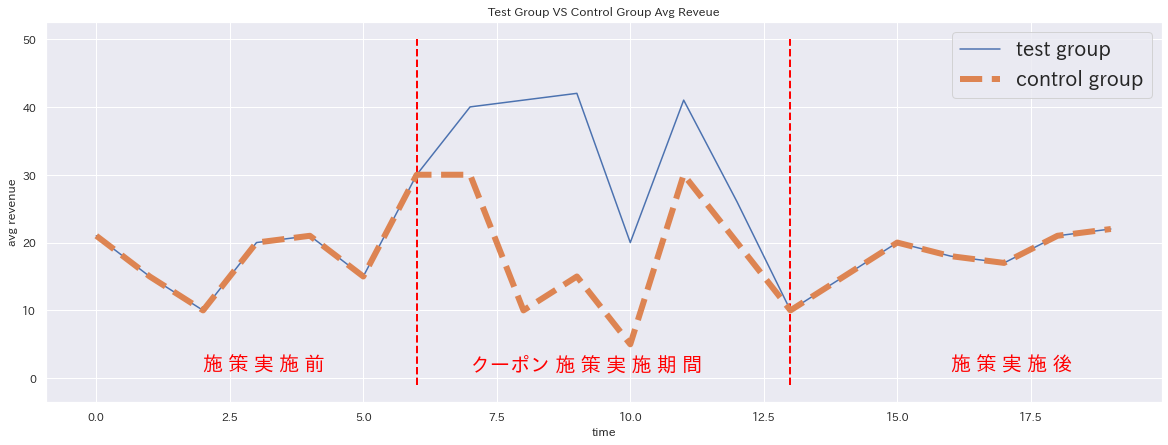

In [ ]:
test_gp =[21,15,10,20,21,15,30,40,41,42,20,41,26,10,15,20,18,17,21,22]
control_gp =[21,15,10,20,21,15,30,30,10,15,5,30,20,10,15,20,18,17,21,22]

plt.figure(figsize=(20,7))
plt.plot(test_gp,label='test group')
plt.plot(control_gp, linewidth=6,linestyle="--",label='control group')
plt.title('Test Group VS Control Group Avg Reveue')
plt.legend(prop={"size": 20}, loc="best")

plt.vlines(6, ymin=-1, ymax=50, colors='red', linestyle='dashed', linewidth=2)
plt.vlines(13, ymin=-1, ymax=50, colors='red', linestyle='dashed', linewidth=2)
plt.annotate("クーポン 施 策 実 施 期 間", xy = (7, 1), size = 20, color = "red")
plt.annotate("施 策 実 施 前", xy = (2, 1), size = 20, color = "red")
plt.annotate("施 策 実 施 後", xy = (16, 1), size = 20, color = "red")
plt.xlabel('time')
plt.ylabel('avg revenue')

上の結果から、施策によって売上が上がったことがわかるので、その売上増分と実際の施策にかかったコストを考慮すれば、その施策のROI（費用対効果）も試算することも可能です。具体的には、以下のようなテストグループとコントロールグループの売り上げの差は100円になります（上の設定から、施策期間中でのみ売り上げの増分が生じています）。

In [ ]:
sum(np.array(test_gp) - np.array(control_gp))

100



ここで単純に計算しますと施策に対する効果が1人あたり100円の増分なので、仮にこの1人あたりのコストが80円だとすると、単純計算で、ROI= 100 / 80 =125%の効果があったと推定されます。（ただし、ここではRCTが厳密に実行されているため、単純に算出できています。）


さらに一部の範囲での実施ならば、全体としてどれだけ効果がありそうかと推定することも可能で、実際に小売店や消費財のメーカーなどではよく一部の地域だけをテストして効果をみて、全国展開するかどうかの判断をしています。（他、別のアプローチとして、人単位ではなく、店舗単位でテスト店舗、コントロール店舗で分けることもあります。）

一方、現実的には、RCTの実施が困難なケースもありますし、筆者もそういったケースを色々と見てきたの、状況は理解できます。コントロールを抜くためにコストがかかったり、サンプル数が足りなかったり、顧客を差別するのはよくないという倫理に関係する意見もあったりします。なお筆者が関わったマーケティング施策でも、コントロールを取っていないケースはありますし、現実的にはなかなか難しいのでしょう。

そういったRCTができない場合でも、厳密性はかけてしまいますが、いくつかのアプローチがあるため、それをこの講座ではいくつか紹介していきます。また、以下の文献では、どのような場合にどういったアプローチが取れるかケース分けが詳しく記述されていますので、参考になります。そのケース分けの体系的で整理された表については、本節の最後の方で紹介します。

参考：
* 『政策評価のための因果関係の見つけ方』のA.3　の表A4実験的方法・準実験的方法の整理

なお、上の例ではROIを単純に計算しましたが、RCTをしていない状況で、この指標を算出するのはあまり厳密でないことが多く、以下の本では、「内部収益率（＝キャンペーンや施策を実施する場合の投資利回り）」や「投資回収期間（＝投じた累計支出と同額の累計利益を稼ぐまでにかかる期間）」などを追うべき指標として、推奨されています。財務的な指標になり、この講座の趣旨からはずれますが、興味のある方は以下の書籍を参考にしてください。（また、データ戦略からの視点ですが、こういった施策の結果はパワーポイントやエクセルでまとめられることが多く、これらが悪いというわけではないですが、指標に一貫性がなかったり、後で統合するのにまた人の手を使って作業することもよく聞きます。ちゃんと施策結果もデータとして貯められる仕組みを構築しておくことで、自社のノウハウとして強みになりますので、インフラ面からも施策結果を蓄積することを検討しておきましょう。）

参考：
* 『最低限知っておくべき15の指標 データ・ドリブン・マーケティング』

#### 補足事項1：全体と部分における統計的関係の逆転
施策の因果推定や分析をしっかりしないと判断を間違う恐れがある例として、シンプソンのパラドクスがよく紹介されます。これは、全体での効果と部分集合での効果は異なることがあるという例になります。具体的な例を使って考えてみましょう。例えば、以下のような購買率の表を考えてみます。これは、ある購買者グループに対して、ある商品のキャンペーン施策を実施して、男女別に購買したかどうかの結果になります。この表から男女別に施策実施と未実施の購買率をみると、男女ともに購買率が高くなっています。施策を実施した場合の男性の購買率は95%であるのに対し未実施の男性は90%で、女性は実施グループと未実施グループそれぞれ81%と71%です。しかし、全体としての合計でみると、施策実施した人たちの購買率が84%で、施策未実施の人たちの購買率が85%となっており、施策を実施しない人たちの購買率が逆に高くなっています。これはいったいどういうことでしょうか。


|  | 施策実施 |  |  | 施策未実施 |  |  |
| --- | --- | --- | --- | --- | --- | --- |
| 性別 | 購買 | 未購買 | 購買率 | 購買 | 未購買 | 購買率 |
| 男性 | 100人 | 5人 | 0.952 | 300人 | 30人 | 0.909 |
| 女性 | 300人 | 70人 | 0.810 | 100人 | 40人 | 0.714 |
| 合計 | 400人 | 75人 | 0.842 | 400人 | 70人 | 0.851 |


男女別の部分集合で見ると、この施策は効果があったようにみえますが、全体としてみると効果がなかったと判断されてしまいます。これがパラドックスといわれる理由です。この問題に対処するためには、古典的な統計学ではアプローチすることができず、「データにある背景」や「その結果を生み出した因果」を考える必要があります。本講座の初級編で「データだけ見ていてもわからないこともある」と述べましたが、それにつながる話になります。

ここでは、例えば、この商品が薬局などの売り場にある男性用のシャンプーだとします。すると、この商品を買う女性もいるかもしれませんが、もともと男性用なので女性の方が購買率は低くなります。そして、施策実施した人との男女の割合を見ると、女性の方が割合として高いです（男性105人、女性370人）。そのため、全体として購買率が低くなっているのは、施策実施された人たちの中からランダムに選べば女性である割合は高くなり、施策未実施の人たちの中からランダムに選んだ購買者より、購買する人が減るという現象になっています。

これは、「施策」＝＞「購買」という関係だけではなく、「性別」＝＞「購買」という別の因子があるということが背景にあると想像できます。このケースだと男女別に分けたデータを用いるべきというのがいえます。

上記の例は、以下の書籍をベースにしており、さらに詳しく学びたい方はぜひ参考にしてください。

参考文献
* 『入門統計的因果推論』

### 10.3.2 RCTによる因果推論

さて概念的なお話が続いたので、ここでは実際にRCTが実施されているデータについて、Pythonを使って手を動かしながら確かめていきましょう。以下は、とあるECサイトでメールマーケティングの施策を実施したデータになります。

・対象データ：

http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv

まずこのデータを読み込んでみます。

In [ ]:
email_analytics_df = pd.read_csv('http://www.minethatdata.com/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv')

In [ ]:
email_analytics_df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


上のデータカラムについて、左から順に、
* recency:直近購買からの経過月数
* history_segment:昨年の購入セグメント
* history:昨年の購入金額
* mens昨年に男性商品の購入履歴があるかフラグ
* womens昨年に女性商品の購入履歴があるかフラグ
* zip_code:地区（zipcodeがベース）、都会や郊外など
* newbie:過去12ヶ月以内に新しいユーザーになったかどうかフラグ
* channel:購買チャネル
* segment:どんなメールが送信されたか（男性、女性、なし）
* visitメール:配信後2週以内にウェブに訪問したかどうかフラグ
* conversion:メール配信後2週以内に購買したかどうかフラグ
* spend:購入した時の金額

になります。

以下でデータをチェックして6万4000レコードあるのがわかります。

In [ ]:
email_analytics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  object 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  object 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  object 
 8   segment          64000 non-null  object 
 9   visit            64000 non-null  int64  
 10  conversion       64000 non-null  int64  
 11  spend            64000 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 5.9+ MB


さて、まずメール施策を実施したかどうかをわかりやすくするために、データ加工処理します。メール施策に関するカラムはsegmentになるため、segmentごとに集計すると以下のようになります。

In [ ]:
email_analytics_df.segment.value_counts()

Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: segment, dtype: int64

Womens E-MailとMens E-Mail でメール送信フラグを1、No E-Mail を0としてカラムを追加します。

In [ ]:
email_analytics_df['flg'] = email_analytics_df["segment"].map(lambda x: 0 if x == "No E-Mail" else 1)
email_analytics_df.flg.value_counts()

1    42694
0    21306
Name: flg, dtype: int64

ここで単純に考えると、メールを送信したグループ(flg=1)と送信していないグループ(flg=0)でコンバージョンや購買金額に差があるのかというのを算出してみます。

In [ ]:
email_analytics_df.groupby(["flg"])["conversion","spend"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,conversion,spend
flg,,
0,0.005726,0.652789
1,0.010681,1.249585


上の結果から、メール送信したグループのコンバージョンは約1%で、メール送信していないグループは約0.5%で2倍近くの違いがあります。そして、購買金額についてみると、メール送信グループは1.24でメールを送信していないグループは0.65でこちらも2倍近くの差があり、その効果の差分は1.24-0.65=0.59の効果があるといえます。

さてここで、この差が統計的に優位かどうか検証してみます。ここでは、ウィルコクソンの順位和検定という手法を使いますが、以下のような前提があるという条件で実施していきます。なお、統計学の推定の単元で学ぶ用語（帰無仮説や対立仮説、p-valueなど）がいくつかあるため、全く馴染みのない方は、簡単な統計の本を使って復習をしてください。

補足：ウィルコクソンの順位和検定の前提

*   2グループの平均値が独立であり(データに対応がない)
*   正規分布が仮定できない(ノンパラメトリック)場合に用いる
*   順序尺度に対応
*   独立2群間の代表値の差の検定
*   各群のサンプル数は不一致でもOK



In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(email_analytics_df[email_analytics_df["flg"]==1]["spend"]
                , email_analytics_df[email_analytics_df["flg"]==0]["spend"]
                ,alternative='two-sided')

有意水準を0.05とすると、以下の判定から、帰無仮説「この2つのグループの差はないこと」は棄却されて、2つのグループの差はあると結論づけられました。よって、この施策は意味があったと考えることができます。

In [ ]:
pvalue < 0.05

True

#### 練習問題
1.   上記のデータに対して、Mens E-MailとNo E-Mail の2グループで差があるかどうか調べてみましょう。
2.   2つの比較グループに対して、過去の購買力に差がないか調べてみましょう。

#### 解答


以下はフィルターした状態で、先ほどと同じように実装しています。

In [ ]:
from scipy import stats
s,pvalue = stats.mannwhitneyu(email_analytics_df[email_analytics_df["segment"]=="No E-Mail"]["spend"]
                , email_analytics_df[email_analytics_df["segment"]=="Mens E-Mail"]["spend"]
                ,alternative='two-sided')
pvalue < 0.05

True

上と同じ結果が得られました。

さて、今はこのデータはRCTが実施されている前提のため、頑健な方法で施策設計や検証がされていますが、もしRCTがされていない場合には、この検証のやり方は正しいのでしょうか？　冒頭で述べた通り、もともと購買力の高い人たちにメールが送られている可能性があり、それを「セレクションバイアス」と言います。その場合、ターゲットがもともと購買力が高い人たちのため、施策の有無にかかわらず、購買が高かった可能性もあります。

そこで、ここでは、メール送信されているグループとされていないグループのそれぞれについて、過去の購買金額を調べてみます。

In [ ]:
email_analytics_df.groupby(["flg"])["history"].mean()

flg
0    240.882653
1    242.686002
Name: history, dtype: float64

RCTが実行されているため、あまり過去の購買金額に差はなさそうですが、念のため検定してみましょう。

In [ ]:
from scipy import stats
s, pvalue = stats.mannwhitneyu(email_analytics_df[email_analytics_df["flg"]==1]["history"]
                , email_analytics_df[email_analytics_df["flg"]==0]["history"]
                ,alternative='two-sided')
pvalue < 0.05

False

上から、帰無仮説は棄却されず、「過去の購買において、この2つのグループの差はない」ことがいえます。RCTがちゃんと実施されているため、セレクションバイアスはないようです。

参考：解答解説はこれで以上ですが、このデータについて、セグメントごとにいろいろと集計できますので、データ理解のために、少し探索的にデータを把握してみましょう。例えば、それぞれの過去のセグメントごとに、それぞれどんなメールを、どれだけの人数に送ったか、それぞれの過去購買金額、コンバージョン人数、コンバージョン率、購買金額合計と購買平均額を算出しています。（以下の実装がわからない方は、pandasの復習をしてください。）

以下の集計結果を見ると、過去のセグメント（購買金額による7つのセグメント）ごとに、それぞれメールを送ったグループとそうでないグループとの差があるのがわかります。

In [ ]:
aggregations = {"history":["mean"]
                ,"conversion":["count","sum","mean"]
                ,"spend":["sum","mean"]}
email_analytics_df.groupby(["history_segment","segment"])["history","conversion","spend"].agg(aggregations).unstack()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


history               ...     spend              
                         mean               ...      mean              
segment           Mens E-Mail    No E-Mail  ... No E-Mail Womens E-Mail
history_segment                             ...                        
1) $0 - $100        51.685487    51.603710  ...  0.516893      1.142713
2) $100 - $200     146.504266   146.165376  ...  0.422895      0.881288
3) $200 - $350     266.791054   267.371335  ...  0.932881      0.609740
4) $350 - $500     418.234845   415.739007  ...  1.010268      0.909378
5) $500 - $750     603.155329   605.527264  ...  0.538856      1.824507
6) $750 - $1,000   852.261693   857.201318  ...  0.349534      0.997791
7) $1,000 +       1308.891164  1285.560144  ...  2.169808      4.676589

[7 rows x 18 columns]

#### 補足事項1：A/Bテスト
このRCTは、いわゆるA/Bテストといわれるアプローチです。インターネット業界ではA/Bテストは常識になっており（ネット上にある広告やデザインなど）、検索エンジンサービスを提供しているGoogleは1日に1000回ものA/Bテストを行っているといわれていますし、またMicrosoftも200回もしているといわれています。A/Bテストに関しては、以下のサイトや最近出た書籍(2021年3月時点、『A/Bテスト実践ガイド』（ASCII）の日本語訳)がとても参考になります。

参考URL
* https://exp-platform.com/2019webconfabtutorial/

参考書籍
* 『A/Bテスト実践ガイド』（ASCII）


一方、インターネット業界以外でも、初級編で紹介したアパレル企業のワークマンもA/Bテストを大量に実施して、どんどん売り上げを伸ばしているようです。

参考URL：ワークマン大量出店の裏にABテスト　実はデータ経営（NIKKEI STYLEより）
* https://style.nikkei.com/article/DGXZZO42636670Z10C19A3000000/

これらの企業成長の背景には、A/Bテストを繰り返して実験をたくさん実行し、素早くPDCAをまわしていく組織文化があり、組織として全社的に取り組むことが重要だとあらためてわかります。

### 10.3.3 回帰分析による因果推論

次は、RCTができない場合はどうするかを考えます。ここでは、回帰分析を使った因果推論を紹介します。（なお、回帰分析は、松尾研究室提供の統計学の章にあり、重回帰分析は、機械学習の教師あり学習の章で復習してください。）

上記で、セレクションバイアスの話をしましたが、回帰分析によって、それを取り除くことを試みます。

さて、回帰分析（重回帰分析）は、2つ以上の説明変数（X）を使って、目的変数（Y）を予測するモデルでした。このメールマーケティングのケースでは、目的変数は購買金額(spend)、説明変数をメールの送信有無(flg)と過去の購買金額(history)とします。ここでは、セレクションバイアスは「過去の購買金額(history)」になり、共変量ともいいます。そして、メール送信の有無が施策のため、これを介入変数ともいいます。


購買金額（Y:アウトカム)　　＜＝　　メール送信有無（X:介入変数）　、　過去の購買金額（Z:共変量)


ここでは、購買金額Yがメールの送信有無の介入変数によって影響を受けているかどうかを知りたいため、なるべく過去の購買金額の共変量（セレクションバイアス）を減らしたいというモチベーションがあります。

上の分析設計にしたがって、重回帰分析を実施します。ここでは、機械学習のsklearnではなく、分析結果を詳細に出力してくれるstatsmodelsを使います。

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(email_analytics_df[["history","flg"]])
y = email_analytics_df["spend"]

model = sm.OLS(y, X)
result = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


重回帰分析モデルの結果を見てみましょう。

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spend   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     26.24
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           4.07e-12
Time:                        11:11:19   Log-Likelihood:            -2.6426e+05
No. Observations:               64000   AIC:                         5.285e+05
Df Residuals:                   63997   BIC:                         5.285e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3464      0.117      2.957      0.003       0.117       0.576
history        0.0013      0.000      5.484      0.000       0.001       0.002
flg            0.5945      0.126      4.715      0.000       0.347       0.842
==============================================================================
Omnibus:                   141122.328   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        699656310.293
Skew:                          20.576   Prob(JB):                         0.00
Kurtosis:                     513.566   Cond. No.                         946.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

上の結果から、切片が0.3464、過去の購買金額の係数が0.0013、メール送信有無の係数が0.5945	になっています。そしてt検定は全てpvaluが0.05より小さくなっているため、係数は有意な結果になりました。

よって、メール送信の効果有無は0.59ほど売り上げをあげる効果があるということがわかり、上のRCTの場合と同じになっているのがわかります。

今回は共変量を1つ選んで追加して重回帰分析を実施し、それはそのセレクションバイアスの影響を減らすためであり、さらに他の共変量を加えて、よりRCTの結果に近づけることができます。

ただ、ここで問題があり、この共変量をデータとして得ることができないケースもあり、完全にセレクションバイアスを取り除くことができないこともあります。その場合、いくつかのアプローチ（操作変数法など）がありますので、本節の最後の方に少し紹介しますが、興味ある方は参考文献などで調べてみてください。

他、この効果検証をするための重回帰分析について、もちろん、なんでもかんでも目的変数や共変量を入れかて実行するアプローチではなく、そのビジネス背景やドメイン知識を使って、しっかりと分析設計を実施した方がより頑健に検証ができます。

#### 練習問題
1.   Mens E-MailとNo E-Mail の２グループデータで上と同じように、重回帰分析を実施して、メールの効果を算出してください。

#### 解答

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(email_analytics_df[email_analytics_df["segment"]!="WoMens E-Mail"][["history","flg"]])
y = email_analytics_df[email_analytics_df["segment"]!="WoMens E-Mail"]["spend"]

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spend   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     26.24
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           4.07e-12
Time:                        11:11:25   Log-Likelihood:            -2.6426e+05
No. Observations:               64000   AIC:                         5.285e+05
Df Residuals:                   63997   BIC:                         5.285e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3464      0.117      2.957      0.003       0.117       0.576
history        0.0013      0.000      5.484      0.000       0.001       0.002
flg            0.5945      0.126      4.715      0.000       0.347       0.842
==============================================================================
Omnibus:                   141122.328   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        699656310.293
Skew:                          20.576   Prob(JB):                         0.00
Kurtosis:                     513.566   Cond. No.                         946.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

同じ結果になっているのがわかります。


### 10.3.4 施策効果検証方法を整理した表と今後の学習
これまで施策の検証について、単純な前後比較とその問題点、RCTが理想的な方法であるということ、そしてそれが困難な場合の回帰分析を用いたアプローチを紹介してきました。

さらにこれら以外にも、施策検証には様々な手法があります。ただ、ここで気になるのが、「結局どのアプローチをとればいいのか」だと思います。それぞれの手法に対する理解度や、その時のケースによったりもするので、いくつか紹介していない手法もありますが、その判断をするための体系的な表が以下になります。

|  | 手法 | 分析方法 | メリット | デメリット |
| --- | --- | --- | --- | --- |
| 厳密な方法 | 1.RCT | 対象者と非対象者をランダムに振り分ける | 正確に測定可能 | 振り分けが難しいケースが多い |
|  | 2.回帰不連続デザイン | 閾値の前後の個人等を比較する | 閾値の前後でかなり正確に測定可能 | 閾値から離れた個人等ではわからない |
|  | 3.マッチング | 対象者と非対象者から似たような人をマッチング | かなり正確に測定可能 | 利用できる変数によっては、正確でない |
|  | 4.操作変数法 | 施策に影響を与える変数を用いる | かなり正確に測定可能 | 適切な操作変数を見つけるのが容易ではない |
|  | 5.差の差推定・固定効果推定 | どちらも施策実施前後のトレンド要因を除去 | 前後比較よりも、正確に測定可能 | これを使う仮定が満たされる必要あり |
|  | 6.合成コントロール法 | 非対象者のデータを合成し仮想的な状況を推定 | 一人、一社でも分析可能 | 施策実施前後の長期的なデータが必要 |
|  | 7.回帰分析・単純比較 | 施策後のデータを使う | データさえあれば簡単に分析でき、「第3要因」にも対応できる | 因果関係が逆だとうまく対処できない |
| 簡易だが厳密でない方法 | 8.前後比較 | 対象者の前後の結果を比較 | 簡単に実施できる | 比較が不正確 |

上記の表では、各手法についての説明やメリットとデメリットが記載されています。上にあるほど厳密なアプローチで、RCTが一番頑健な方法となります。この講義では扱えきれなかった方法もありますので、実務で本格的に使おうと検討されている方は、以下の参考文献を見て、取り組んでください。特に『政策評価のための因果関係の見つけ方』は、数式がでてくる章もありますが、最後の章だけでも読むことをお勧めします。

参考文献：
* 『政策評価のための因果関係の見つけ方』（日本評論社）
* 『入門統計的因果推論』（朝倉書店）


他にも施策検証として、さまざまなアプローチがあります。構造方程式やベイズ構造時系列モデルを使ったり、ベイズネットワークを使った因果推論、ランダムフォレストなどの機械学習アプローチもあります。さらに深層学習GANを使った因果探索（SAM）、強化学習などもあります。実務で使いそうな方や興味を持った方は以下の参考文献で紹介されていますので、参考にしてください。因果推論に関するライブラリも載せておきます。上の本と合わせて読めば、中級レベルとしては十分だと思います。

参考文献：
* 『効果検証入門』（技術評論社）
* 『Pythonによる因果分析』（マイナビ出版）
* 『統計的因果推論』（朝倉書店）
* 『統計的因果探索』（講談社）

参考ライブラリ：因果推論に関するPythonのライブラリ

*   DoWhy：観測データと変数間因果に関する知識から、介入効果を測定することができるライブラリ

*   EconML：ターゲット変数に影響を与えるような変数に関して条件付けがなされた設定で、介入効果を測定することに特化したライブラリ

*   CausalML：特定の属性に絞って、介入効果を測定することに特化したライブラリ

*   CausalImpact：時系列のデータに対して、介入前後の両方のデータ得られるときに、介入しなかった場合の時系列を予測し、介入による効果を測定できるライブラリ



あとは施策をする前に、事業戦略やマーケティング戦略に合わせて、施策実験のデザインをしっかり決めて施策を実行し、素早くPDCAをまわしていく体制を組織として作っていくことが、とても重要になります。以下先ほども紹介した参考書籍は、オンラインにおけるA/Bテストについてがメインですが、素早く実験を繰り返していくこと、その中でも改善できることは少しずつであるということが述べられており（GoogleやMicrosoftという大きな会社でさえもです）、継続的に続けていくことの大切さもわかります。こちらの文献も興味ある方はぜひ参考にしてください。

参考文献：
* 『A/Bテスト実践ガイド』（ASCII）

## 10.4 Pythonを使ったBIツール作成とレポーティング、その自動処理

キーワード：分析レポーティングの自動化、自動処理、様々なツールとの連携、Plotly、Dash、メール送信、Slack連携、PDFファイル作成

### 10.4.1 分析結果やレポート作成の自動化（レポーティングやBIツール作成）

ここからは、分析結果に関するレポーティングやそのBIツールの作成方法、それらを自動化する方法を紹介していきます。分析を実施し、その施策やサービス展開などをした後は、それらの効果測定になります。それらをどうレポーティングするか、定期的なKPIのチェックをするためのBIツールの作成方法、その他の通知するためのツール連携も紹介していきます。

マーケティング戦略で設定したKPIの数値集計や可視化、分析結果のチェックなどをする際、それらを毎回手作業でやったり、都度コーディングしたり、都度レポートを作成していたら、とても時間が取られます。KPIとして追う数値や仕様などが決まったら、数ヶ月〜半年間はそれらの推移をみていくことになりますし、その集計やレポートは定型作業になります。そのための手作業、データの加工やレポーティング、可視化や通知などは、可能な限り自動的に処理させましょう。そうすれば、私たちは数値やグラフを最終チェックするだけでよいですし、その数値を見て、改善点の検討などに時間を割いていくことができます。自動処理できるところはPythonに任せてしまいましょう。

ここでは、簡単なBI的なツールの作成とレポート作成（PDFなど含む）、エクセルの他にGoogleSpreadSheetの処理やメールの送信、Slackなどの連携について紹介します。


### 10.4.2 自動レポートやBIツール・ダッシュボードを作成する前に


さて、レポーティングの自動化やBIツール作成をする前に大事なことがあります。初級編のデータ分析で重要なことで述べたことと同じようなメッセージになりますが、ダッシュボードやレポートを作成する目的や何を知りたいかを明らかにすることです。

BIツールの流行もあり、色々な企業で導入されているようですが、BIツールを構築したけれども、いろいろなグラフがたくさんあるだけで、結局何がやりたいのかわからないというケースも耳にします。そのグラフを使って、何をチェックしたいのか、それを見て次どのようなアクションを起こしたいかなど、ビジネス的な意思決定や業務フローなどに組み込む必要があります。そうでないと、最終的にそのBIツールが使われなくなる可能性もあります。本講義のような実装のための練習ならば良いのですが、現場ではビジネスアクションに繋がるレポートやBIツールを作成していきましょう。

### 10.4.3 Pythonで作るBIツール・ダッシュボード


まず、データの可視化をインタラクティブに操作できるためのライブラリPlotlyとDashを紹介します。データをグラフ化するだけならば、Matplotlibなどで十分に思われるかもしれません。しかし、データ上、あるケースだけを見たい場合（年度ごとかつカテゴリーごとにグラフを変化させるなど）には、Matplotlibではいちいちコードを書き換えるなどする必要があります。もちろん、設計によってはそのように実装することも可能ですが、素早くデータを変更しながらそのグラフも変更させたいとなると、少し時間がかかります。

ここで紹介するPlotlyやDashを使えば、そういった年度ごとカテゴリーごとのデータを変更して、それに合わせてグラフも変化するBIツールをさくっと作成することができます。そして、データに対する探索も、いろいろとグラフを変更しながら、素早く実行して可視化することができます。データをコツコツ見る大切さも述べましたが、視覚的にはグラフなどになっている方が理解が早いこともあります。この節では、インタラクティブにグラフを操作できるPlotlyとそれをWebアプリとして構築できるDashについて解説をしていきます。これらが使えるようになれば、ウェブ上でのデータ可視化結果の公開も簡単にできますし、他のプログラミング言語より簡単に実装可能です。それでは実装を見ていきましょう。

この環境にはすでにplotlyが入っていますが、念のためアップデートをしましょう。

In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 25.3 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


以下で必要なライブラリをインポートします。

In [ ]:
import plotly
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import datetime

以下は、データ可視化に使うためのデータを準備するためにインポートします。株価のデータになります。

In [ ]:
import pandas_datareader.data as web

上のpandas_datareaderから、2010年1月１日から2020年12月31日までのGoogleの株価データを取得します。以下で、取得開始日、終わり日、対象株価データを指定して、株価データを約11年分取得しています。

In [ ]:
st_dt = datetime.datetime(2010, 1, 1)
end_dt = datetime.datetime(2020, 12, 31)
google_df = web.DataReader('GOOG', 'stooq', st_dt, end_dt)

In [ ]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1705 entries, 2020-12-31 to 2014-03-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1705 non-null   float64
 1   High    1705 non-null   float64
 2   Low     1705 non-null   float64
 3   Close   1705 non-null   float64
 4   Volume  1705 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 79.9 KB


In [ ]:
google_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,1735.420,1758.9300,1735.420,1751.88,1012240
2020-12-30,1762.010,1765.0950,1725.600,1739.52,1306130
2020-12-29,1787.790,1792.4400,1756.090,1758.72,1299395
2020-12-28,1751.635,1790.7276,1746.335,1776.09,1393033
2020-12-24,1735.000,1746.0000,1729.110,1738.85,346753


さて、データを可視化するためには、matplolibを使えば、このような時系列データを可視化してその時系列な傾向を見ることができました。ここでは、この株価について、その日ごとの始値、終値、高値、安値についてもグラフで同時に見ることができるようにします。いわゆるローソク足といわれるものになります。ここでは、Plotlyを使用します。Plotlyを使うとローソク足チャートを簡単に描くことができます。高値や安値などそれぞれの値は日によって異なります。値動きが激しい日は、高値と安値は大きくひらきます。日によってそれらの傾向は異なるため、それを把握するためにローソク足チャートを見ます。

以下ではローソク足のチャートを作成するための実装になります。

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=google_df.index,
                open=google_df['Open'],
                high=google_df['High'],
                low=google_df['Low'],
                close=google_df['Close'])])

fig.update_layout(
    title_text="Candle　Google Stock"
)


さらに、以下のようにrangeselectorに設定することで、1ヶ月前、6ヶ月前、1年前にグラフを変更することができます。グラフの左上のボタンを押すことで変えることができます。

In [ ]:
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

上のグラフにカーソルをあてると、いろいろとグラフの見る範囲などが変更できるます。他にも大きさを変更したり、画像で保存することもできますので、操作してみてください。

なお、上のグラフになっているファイルをHTML形式で保存することも可能です。

In [ ]:
# html file
plotly.offline.plot(fig, filename='output.html')

'output.html'

そして、左のフォルダからダウンロードできますし、以下のコードを利用して、ファイル名を指定し実行することで、ウェブ上にあるgoogle colaboratoryからローカルへファイルダウンロードができます。

In [ ]:
from google.colab import files
files.download('output.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

上で見ていただいたように、Plotlyを使えば、インタラクティブにグラフを操作できることがわかったと思います。次に、ウェブのアプリ開発にも使えるDashを使っていきます。必要なパッケージをインストールします。Dashとこの環境でDashを使うため、jupyter_dashをインストールします。

In [ ]:
!pip install dash

     |████████████████████████████████| 7.3 MB 4.1 MB/s 
     |████████████████████████████████| 357 kB 45.8 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=fe3aa176e192d8029365d01a24c2165a4ee15288ba85b2fbdd9ff0766174819b
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=5bf0a69babeab70f1a9726b646d7e6e6986329bdfe4b90c95d2e279f94086183
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=5553599a462cd322aad0b316a6b82214084d5bb3916afe9bdd9b7ead67d33051
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aefd2e2
Successfully built dash-core-components dash-html-com

In [ ]:
!pip install jupyter_dash

次に、グラフ化する対象のデータを処理していきます。この講座の初級編でも取り扱ったECサイトの法人POSデータです。前処理等について同じのため、説明は割愛します。

In [ ]:
# UCIのウェブサイトにあるエクセルデータを読み込む
# UCIのウェブサイトにあるデータをダウンロード
!wget "http://archive.ics.uci.edu/static/public/352/online+retail.zip"
# ダウンロードしたデータを解凍する
!unzip "./online+retail.zip"
# 解凍したエクセルデータを読み込む
file_url = './Online Retail.xlsx'
all_online_retail_data = pd.ExcelFile(file_url)
online_retail_data_table = all_online_retail_data.parse('Online Retail')
online_retail_data_table = online_retail_data_table[(online_retail_data_table.CustomerID.notnull())]
online_retail_data_table.CustomerID = online_retail_data_table.CustomerID.astype(int)
online_retail_data_table['TotalPrice'] = online_retail_data_table.Quantity * online_retail_data_table.UnitPrice
online_retail_data_table.set_index(['InvoiceDate'],inplace=True)

次に、ここでチェックしたい項目を定めます。ここでは、月ごとの売上を国別にみたいとします。以下は、pandasのresample機能を使って、国ごと、月ごとに売上を算出しています。

In [ ]:
country_totalp_m_df = online_retail_data_table.groupby(["Country"])['TotalPrice'].resample('M').sum().reset_index()
country_totalp_m_df.head()

,Country,InvoiceDate,TotalPrice
0,Australia,2010-12-31,1005.10
1,Australia,2011-01-31,9017.71
2,Australia,2011-02-28,14627.47
3,Australia,2011-03-31,17055.29
4,Australia,2011-04-30,333.40


もちろん、Matplotlibを使えば、これらの一気にグラフ化することはできますが、ごちゃ混ぜで見にくくなります。そこで、先程のPlotlyとこのDashを使って、プルダウンで国を選択できるようにしましょう。必要なライブラリ等をインポートします。

In [ ]:
import dash 
from jupyter_dash import JupyterDash 
import dash_core_components as dcc 
from dash import html
import plotly.express as px
from dash.dependencies import Input, Output

以下を実行すると、月ごとの売上推移が表示され、その国を変更することで、時系列の売上グラフが変更されます。オーストラリアがデフォルトになっています。HTMLやCSSなどウェブ系の言語を知らなくても、ウェブブラウザ上でインタラクティブに動くグラフを作成することが可能になります。

In [ ]:
app = JupyterDash(__name__)
app.layout = html.Div([
                       dcc.Dropdown(id="my_dropdown",
                                    options=[{"value": cnt, "label": cnt} for cnt in country_totalp_m_df.Country.unique()],
                                    value="Australia"
                                    ),
                       dcc.Graph(id="my_graph")
])

@app.callback(Output("my_graph", "figure"), Input("my_dropdown", "value"))
def update_graph(selected_country):
  selected_country_totalp_m_df = country_totalp_m_df[country_totalp_m_df["Country"] == selected_country]
  return px.line(selected_country_totalp_m_df, x="InvoiceDate", y="TotalPrice")

app.run_server(mode="inline")

<IPython.core.display.Javascript object>

@のコールバックについてはみなれない方向けに簡単に解説をします。コールバックとは、ある特定のイベントが起きた時に、別の関数を呼び出すための処理です。何かの要素がクリックされたりしたときに、グラフが変更されたりします。上の例でいうと、update_graphで定めた関数で引数がselected_countryとなっています。関数の中身を見ると、あるCountryでフィルタリングされているのがわかると思います。

次に、この月ごとの売上について、各国ごとにデータがあるため、世界地図を使って売上データの可視化をしていきましょう。実は、今回のケースでいうと地域が限られているため無理をして世界地図を作成する必要ないですが、世界地図を見ることで、地域ごとの偏りやその売上傾向を把握することができますので、その練習だと思って取り組みましょう。

以下は、plotlyのexpressに入っているデータです。

国名、 大陸名、 データ取得年度、 寿命、 人口、 一人当たりのGDP、 iso_lpha(国の略称)、iso_num（国のひも付け番号）になります。国の略称を使って国を認識したいため、以下のデータを先ほどの月ごと売上データと結合して使うことにします。

In [ ]:
gapminder = px.data.gapminder()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


また、先ほどの売上データと結合するため、データカラム名を変更します。

In [ ]:
country_totalp_m_df.columns = ["country","invicedate","totalprice"]

以下では、それぞれの国ごとにレコードを絞るためにデータを処理しています。


In [ ]:
new_information_tb = gapminder.groupby(["country","continent","iso_num","iso_alpha"])["year"].count().reset_index()
new_information_tb

,country,continent,iso_num,iso_alpha,year
0,Afghanistan,Asia,4,AFG,12
1,Albania,Europe,8,ALB,12
2,Algeria,Africa,12,DZA,12
3,Angola,Africa,24,AGO,12
4,Argentina,Americas,32,ARG,12
...,...,...,...,...,...
137,Vietnam,Asia,704,VNM,12
138,West Bank and Gaza,Asia,275,PSE,12
139,"Yemen, Rep.",Asia,887,YEM,12
140,Zambia,Africa,894,ZMB,12


以下で、データのマージをします。さらに、naのレコードもあるため、ここでは一旦対象外とするため、削除します。

In [ ]:
merge_df = country_totalp_m_df.merge(new_information_tb, how='left',on="country")

In [ ]:
merge_df.dropna(inplace=True)
merge_df

,country,invicedate,totalprice,continent,iso_num,iso_alpha,year
0,Australia,2010-12-31,1005.100,Oceania,36.0,AUS,12.0
1,Australia,2011-01-31,9017.710,Oceania,36.0,AUS,12.0
2,Australia,2011-02-28,14627.470,Oceania,36.0,AUS,12.0
3,Australia,2011-03-31,17055.290,Oceania,36.0,AUS,12.0
4,Australia,2011-04-30,333.400,Oceania,36.0,AUS,12.0
...,...,...,...,...,...,...,...
349,United Kingdom,2011-08-31,477008.410,Europe,826.0,GBR,12.0
350,United Kingdom,2011-09-30,776529.842,Europe,826.0,GBR,12.0
351,United Kingdom,2011-10-31,782777.880,Europe,826.0,GBR,12.0
352,United Kingdom,2011-11-30,956109.660,Europe,826.0,GBR,12.0


そして、ここでは、以前見たようにイギリスの売上が大きすぎるので、一旦イギリスは省きます。また、一部売上がマイナスになっているため、それも排除します。

In [ ]:
new_merge_df = merge_df[(merge_df.totalprice>0) &(merge_df.country!="United Kingdom")]

次に、年月の表示形式するために型を変更します。

In [ ]:
new_merge_df["YYYYMM"] = pd.to_datetime(new_merge_df["invicedate"]).dt.strftime("%Y%m")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



これでデータの前処理が終わりました。世界地図は、scatter_geoを使いまして、それぞれ対象となるデータ、区分するカラムやバブルの対象など設定します。


以下でそれぞれの国ごとに、売上の大きさをバブルチャートの大きさにした世界地図になります。さらに、住んでいる地域も色分けされています。

In [ ]:
fig = px.scatter_geo(new_merge_df, locations="iso_alpha", color="continent",
                     hover_name="country", size="totalprice",
                     animation_frame="YYYYMM",
                     projection="natural earth")
fig.show()

上のグラフにおける再生ボタンを押すと月ごとの結果をアニメーションとして見ることもできますし、plotlyでやった時と同じように拡大縮小したり、画像を保存等することもできます。

以上でBIツール的なダッシュボードを作成する簡単な紹介は終わりになります。もちろん、市販されているソフトやクラウドサービスを使うことでデータの可視化はやりやすくなっていますが、Pythonによる実装はそんなに難しくなく、高価なソフトを買う必要もなく、細かな修正など既存のBIツールでは対応できないデータ処理や可視化もpythonを使えば可能です。こういった可視化ツールも自社で開発していれば、修正も容易にでき、よりPDCAサイクルを早くまわすこともできます。

#### 練習問題
1.   上記で読み込んだ、gapminderのデータに対して、上のような世界地図を作成し(バブルの大きさはlifeExp	としてください)、グラフ化して動かせるようにしましょう。また、バブルの大きさを一人当たりのGDPや人口に変更したグラフも作成してみましょう。



#### 解答

In [ ]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


平均寿命

In [ ]:
fig2 = px.scatter_geo(gapminder, locations="iso_alpha", color="continent",
                     hover_name="country", size="lifeExp",
                     animation_frame="year",
                     projection="natural earth")
fig2.show()

一人当たりのGDP

In [ ]:
fig2 = px.scatter_geo(gapminder, locations="iso_alpha", color="continent",
                     hover_name="country", size="gdpPercap",
                     animation_frame="year",
                     projection="natural earth")
fig2.show()

人口

In [ ]:
fig2 = px.scatter_geo(gapminder, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig2.show()

#### 補足事項1　日本地図を使う


地図に関するpythonのライブラリとして、日本地図の都道府県を表示してくれるjapanpanmapがあります。都道府県ごとに色を変更するなど可能です。

In [ ]:
!pip install japanmap

     |████████████████████████████████| 167 kB 4.0 MB/s 
     |████████████████████████████████| 60.3 MB 1.3 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


以下はpictureをインポートして、日本地図を表示して、東京都を青で（色名）指定し、大阪府を黄色で（RGB値）指定して表示しています。

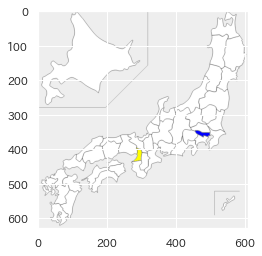

In [ ]:
from japanmap import picture

plt.imshow(picture({'東京都':'blue','大阪府':(255,255,0)}));

他のライブラリとして、より詳細な地図を使いたい場合や、より拡大や縮小を柔軟に実行したい場合にはfoliumを使うと便利です。

公式サイト：https://python-visualization.github.io/folium/

In [ ]:
!pip install folium

東京駅周辺の地図を表示してみます。東京駅の緯度経度を調べてみると、(35.6809591,139.7673068)になりますので、それをlocationのパラメータとしてセットします。また、東京駅にマークを付ける場合は、Markerを使います。

In [ ]:
import folium

# 地図作成とマークの付与
folium_map = folium.Map(location=[35.6809591,139.7673068], zoom_start=16)
folium.Marker(location=[35.6809591,139.7673068]).add_to(folium_map)

# 地図の表示
folium_map

この詳細な地図は粒度がかなり細かいので、分析でざっくり可視化する場面としてはそれほど多くはないかもしれませんが、以下のようにPolyLineを使って経路のマークもできますので、例えば、流通の最短経路の計算などに使えるかもしれません。

In [ ]:
loc = [(35.6809591,139.7673068),
       (35.6809117,139.7576692)]

folium.PolyLine(loc,
                color='red',
                weight=15,
                opacity=0.8).add_to(folium_map)
folium_map


### 10.4.4 Pythonで操るGoogle Spread Sheet（セキュリティ注意）

次に、Pythonを使ってGoogle Spread Sheetを操る方法を紹介します。エクセルの操作については、消費者分析の初級編や上のデータ処理から、Pandasの操作と合わせて、比較的容易にデータ処理できると思います。近年はエクセルの他に、クラウドにあるGoogle Spread Sheetを使っている企業も増えてきています。ここでは、そのGoogle Spread Sheetを直接Pythonで処理していく方法を紹介していきます。この手法を知ることによって、Googleのクラウドで管理していたファイル操作（シートにある数字処理など）も自動化できます。

まず、そのための使うパッケージをインストールします。



https://qiita.com/safa/items/bfa52430f920ac562bec

In [ ]:
!pip install gspread

以下が必要なライブラリ等になります。

**注意：ここから一部、Googleのアカウントを持っていなかったり、企業のセキュリティのため実行できない場合がありますのでご了承ください。またセキュリティ情報を扱うため、実行の際には各情報セキュリティポリシーに従って、パスワード情報などは十分に注意して扱ってください。**


全て実行すると、認証のためのURLが表示されるため、そのURLクリックして、「Google Cloud SDK が Google アカウントへのアクセスをリクエストしています」と出るため許可をします。そのあとに「このコードをコピーし、アプリケーションに切り替えて貼り付けてください。」と出てくるための、コードをコピーして、以下の入力欄にペーストしてEnterすれば認証が完了します。

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

以下でアカウトにあるGoogleDriveにあるファイル一覧を表示しています。なお、筆者の環境にて、あらかじめ、passという今後使うパスワードの情報ファイルと、サンプルとしてのデータ(sample_data_2021)を用意しています。

In [ ]:
workbook_list = gc.openall()
for workbook in workbook_list:
  print(workbook.title) # 取得したファイルのタイトルを表示

pass
sample_data_2021


以下でGoogleスプレッドシートを指定して、処理していきます。

In [ ]:
ss_name = "sample_data_2021"
workbook = gc.open(ss_name)

In [ ]:
worksheet = workbook.get_worksheet(0)

In [ ]:
print(worksheet.acell("C2").value)

0.8046137243


他にも、スプレッドシートのIDやURLを指定して処理したり、もちろん、シートへの書き込みや削除などもできます。何か数値などGoogleSpreadSheetで管理され、定期的に数値を集計したり、加工する必要がある場合には、pythonとgspreadを活用できますので検討してみてください。


### 10.4.5 Pythonで作るPDFレポート

数値を整えたり、グラフを作成した後は、それらをまとめるためのレポート作成について紹介します。ここではPDF出力を紹介します。ここではreportlabというパッケージをインストールします。以下に公式サイトがあります。

公式サイト：https://www.reportlab.com/

そして、サンプルとして以下のようなPDFレポートを作成ができます。

https://www.reportlab.com/media/pix/RLIMG_04e546a82cc44dbc9ac6699aa7572865.PDF

reportlabをインストールしています。

In [ ]:
!pip install reportlab

     |████████████████████████████████| 2.7 MB 4.0 MB/s 


次に必要なライブラリ等をインポートします。

In [ ]:
from reportlab.pdfgen import canvas
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.cidfonts import UnicodeCIDFont
from reportlab.lib.units import cm
from reportlab.lib.pagesizes import A4, portrait
from PIL import Image
from matplotlib.backends.backend_pdf import PdfPages
import datetime

以下は、現在の日時を取得し、それを最終的にPDFレポートとして出力する実装です。

In [ ]:
# 現在の日時取得
d_today = datetime.date.today()

### PDFファイルを生成 ###
file_name = 'Report'+str(d_today)+'.pdf'    # ファイル名
pdf = canvas.Canvas(file_name, pagesize=portrait(A4))    # サイズA4
pdf.saveState()    # 保存

pdf.setAuthor('OFFICE54')
pdf.setTitle(str(d_today))
pdf.setSubject('TEST TEST TEST')

### 線の描画 ###
pdf.setLineWidth(1)
pdf.line(10*cm, 25*cm, 10*cm, 1*cm)

### フォント、サイズを設定 ###
pdfmetrics.registerFont(UnicodeCIDFont('HeiseiKakuGo-W5'))
pdf.setFont('HeiseiKakuGo-W5', 12)

### 文字を描画 ###
pdf.drawString(1*cm, 26*cm, str(d_today))

pdf.setFont('HeiseiKakuGo-W5', 20)    # フォントサイズ変更
width, height = A4  # A4サイズ
pdf.drawCentredString(width / 2, height - 2*cm, '本日'+str(d_today)+'のKPI状況と過去の推移')

pdf.save()

以下で上記で作成したPDFファイルがあることを確認しています。

In [ ]:
ls

adc.json  output.html  Report2021-12-06.pdf  sample_data/


ファイル名は「ReportYYYY-MM-DD.pdf 」になり、作成したPDFファイルをローカルにダウンロードすることも可能です。

In [ ]:
from google.colab import files
files.download(file_name) # ファイル変数名指定

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

以上で、PDFファイルの作成については終わりになります。

### 10.4.6 Pythonで自動化する通知機能（セキュリティ注意）

分析のためのレポートを作成する処理について、データ量や前処理、その報告するボリュームによっては、時間がかかることもあります。自動化をする方法としては、WINDOWSのタイムスケジューラを使ったり、LINUXのcronなどを使って、日次や週次のバッチ処理を作成することも可能です。一定程度のレポート作成であればある程度計算処理時間の見通しはつきますが、処理がちゃんと終わっているのかどうか、いちいちチェックするのも面倒です。そこで、その処理が完了したことを自動的に通知する方法をここで紹介します。Pythonを使ってメールに添付して送信したり、Slackやライン、Teamsなどを使って通知する方法があります。ここではメールとSlackを使って実演してみます。

ただし、ここではセキュリティ絡みの設定をする必要があるため、方法論だけを紹介します。もし業務などで使う場面が出てきたら、セキュリティなどに注意して、実行してください。

#### 10.4.6.1 メールでの通知とファイルの添付

ここでは、Gmailを使った方法を紹介します。なお、グーグルのアカウント設定にて、「安全性の低いアプリからのアカウントへのアクセスを許可する」をONにする必要があり、セキュリティ上に問題があるため、まず学習する際は別のアカウントなどを作成すると良いでしょう。

「安全性の低いアプリからのアカウントへのアクセスを許可する」をONにする方法は、グーグルアカウントの管理画面にて、セキュリティで下の方に「安全性の低いアプリへのアクセス」があるので、「アクセスを有効にする」にて「安全性の低いアプリの許可: 有効」にします。

メールの送信に使うライブラリをインポートします。なお、MIMEとは、「Multipurpose Internet Mail Extensions」の略でTCP/IPネットワーク上でやり取りする電子メールの規格・仕様です。ASCII英数字以外のデータを取り扱うことができます。

In [ ]:
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
import smtplib
from os.path import basename

ここで自分が使うメールのアカウント情報、メールの送信先情報を設定します。ここでパスワード情報がある直で書くようなことはせず、google driveにあるファイルからパスワードを読み込むようにします。

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
# password取得
ss_name = "pass"
workbook = gc.open(ss_name)
worksheet = workbook.get_worksheet(0)
password = worksheet.acell("A1").value

In [ ]:
# SMTP認証情報
account = "test.kunitaka@gmail.com"

以下に送信先と送信元を設定します。

In [ ]:
# 送受信先
to_email = "test.kunitaka@gmail.com"
from_email = "test.kunitaka@gmail.com"

次に、メールのタイトル(subject)とメール本文（message）、送信先や送信元などを設定します。

In [ ]:
# MIMEの作成
import datetime

subject = "テストメール20210331"
text = " 初めまして。よろしくお願いいたします"
message = "こちらはテストメールになります:" + str(datetime.datetime.today()) + text
msg = MIMEText(message, "html")
msg["Subject"] = subject
msg["To"] = to_email
msg["From"] = from_email

以下で送信します。

In [ ]:
# メール送信処理
server = smtplib.SMTP("smtp.gmail.com", 587)
server.starttls()
server.login(account, password)
server.send_message(msg)
server.quit()

(221, b'2.0.0 closing connection z3sm134011vsi.20 - gsmtp')

注意：ONしていないと「安全性の低いアプリをブロックしました」とでます。

これでメールの送信が完了します。

次に、メールで添付ファイルをつけたい時は、以下のように実装をします。先ほど上で作成したPDFファイルを添付してみましょう。

In [ ]:
# MIMEの作成
subject = "レポート作成メール"+ str(datetime.datetime.today())
message = "本日のレポートになります。"+ str(datetime.datetime.today())
msg = MIMEMultipart()
msg["Subject"] = subject
msg["To"] = to_email
msg["From"] = from_email
msg.attach(MIMEText(message))

# PDFファイルを添付/HTMLファイルなども可
path = "./"+file_name
with open(path, "rb") as f:
    part = MIMEApplication(
        f.read(),
        Name=basename(path)
    )
 
part['Content-Disposition'] = 'attachment; filename="%s"' % basename(path)
msg.attach(part)
 
# メール送信処理
server = smtplib.SMTP("smtp.gmail.com", 587)
server.starttls()
server.login(account, password)
server.send_message(msg)
server.quit()


(221, b'2.0.0 closing connection y20sm151787vsm.15 - gsmtp')

メールを確かめてみると、先程のPDFファイルが添付されて送付されているがわかります。もちろん、5.3で作成したGoogle株価の時系列推移のHTMLファイルも、メールに添付して送付することも可能です。

#### 10.4.6.2 Slackでの通知

次はPythonを使ってSlackへ投稿してみます。ステップとしては以下になります。



1.   Slackの設定にて、Incoming Webhookで投稿先のチャネルを選択し(Post to Channel)、「Add Incoming Webhook integration」をクリックする。
2.   Webhook URLが表示されるので、それをコピーする
3.   「Save Settings」をクリックする


pythonからslackに投稿するために、slackwebが必要なため、インストールします。

In [ ]:
!pip install slackweb

  Created wheel for slackweb: filename=slackweb-1.0.5-cp37-none-any.whl size=1853 sha256=200da471fd4903e5443576c686f0eb445f2f2a71179719bcb362eb3591bb832e
  Stored in directory: /root/.cache/pip/wheels/31/85/db/daa523e8ecc46a6cee4a04fa89fa05a053295d66063d640696
Successfully built slackweb


取得したURLを同じく、Google Driveのファイル内に保存をしておき、そこのファイルを読み込むようにします。

In [ ]:
import slackweb

# password取得
slack_url = worksheet.acell("A2").value

In [ ]:
slack = slackweb.Slack(url="https://hooks.slack.com/services/"+slack_url)
slack.notify(text="pythonからSlackに投稿します。今日の日時は"+str(datetime.datetime.today())+"です。")

'ok'

上記でOKが出ており、またSlackを確かめるとメッセージが投稿されているのがわかります。

これでPythonを使ったSlackへの投稿についての説明は終わりになります。Slackにも添付ファイルをつけて投稿することもできますし、他にも同じようにPythonを使って（使うライブラリ等は異なります。）、LineやMicrosoftのteamsなどへも投稿できますので、興味のある方は調べてみてください。

以上で、分析実行後のBIツール作成やレポート作成、通知するためのメールやSlackへの投稿についての解説は終わります。これら単体の技術だけではあまり意味がないですが、冒頭で述べたように、これらの技術を組み合わせてマーケティングシステムを設計し、実装することで、オペレーション負荷を下げることもできます。大事なのは、その数値やレポート自体を作ることではなく、経営や企画の改善につながる数値を見て、次のアクションにつながるようなPDCAサイクルをいかに早くまわせるかです。本章の実装を見ていただいた通り、それほど難易度が高いものではないため、自社での開発も検討することができますし、外部に委託するとしても、どのような実装が必要かをある程度理解した上でプロジェクトを進めると、より良いビジネス結果が出せるでしょう。

参考文献：

『Python インタラクティブ・データビジュアライゼーション入門』（朝倉書店）

#### 練習問題
1.   上記のライブラリ等を使って、分析用レポート作成のための自動化の流れを設計し、実装してみましょう。


#### 補足事項1
上の説明したように定期実行は、Linuxではcronを使って実現できますが、pythonのcrontabライブラリやscheduleを使うことによっても実行可能になります。ここではschduleを紹介します。

In [ ]:
!pip install schedule

以下では処理させるjob関数として、現在日時を表示します。

In [ ]:
import schedule
import datetime
import time

def job():
    print(datetime.datetime.now())

次に、スケジュールに10秒ごとにこれを実行することにして、以下で設定して、実行します。everyのあとのsecondsは秒を表し、分や時間などにも変更可能です。

In [ ]:
schedule.every(10).seconds.do(job)

while True:
    schedule.run_pending()
    time.sleep(1)

上記は無限ループになっているため、計算をとめる時は、停止ボタンを押してください。

## 10.5 消費者分析の今後のステップについて

キーワード：ビジネスにおけるデータ分析プロジェクト、マーケティング分析の高度なアプローチ


### 10.5.1 現場でデータ分析プロジェクトを進める前に

いよいよこの消費者分析の中級編も、最後の節になりました。本講座では消費者分析の初級編からこの中級編にかけて、実際に皆さんの手を動かせることを目的に、消費者分析のためのPython実装を中心に解説してきました。もちろん、初級編でも述べたように、実際のビジネスではプログラミングやテクニカルな話だけではなく、企業戦略や様々な視点から考える必要があります。そもそもビジネス背景や課題となっていることは何か、分析したいことは何か、予測モデルを構築したら何が嬉しいのか、対象データは何か、運用をどうしていくか等、実際のプロジェクトでは考えることがたくさんあります。Python実装ができるだけでは、データ分析の価値を高めることはできませんし、顧客へのサービス向上も難しいでしょう。ビジネスゴールやプロジェクト目標に向かって、適切に分析設計をして、実装し、そのビジネス効果試算、実行、検証、運用まで検討し、改善をしていくいわゆるPDCAサイクルの流れを作っていくことが重要になっていきます。そして、それらをCRMの新しい結果データとして蓄積していくことも大事になってきます。この講義を通じて、それぞれのフェーズごとに（データ読み込みから探索、モデル構築や検証方法、自動化など）Pythonでいろいろと実装できるということ、それらを一貫して構築できることを、ある程度理解していただけたと思います。


データ分析の力を身に付ける一番の方法は、実務でデータ分析を経験していくことですが、いきなり現場で本番データを使って、目的もあいまいの状態で分析プロジェクトを実施すると、頓挫する可能性が大ですし、それを推進していくことも難しいと思います。そこでまずは、その練習として、仮想的なプロジェクトを想定し、以下のようなサンプルデータを用いて、どんな分析ができて、どんなビジネスインパクトが出せそうか、分析設計してみることをお勧めします。仮想とはいえ、色々と考える材料はありますし、データの分析実装、その先の運用やデータとして必要なITインフラの構築、今後のビジネス拡大を想像することは、ケーススタディとして良い練習になります。Pythonの実装や単なるデータ集計、モデル作成だけにとどまらず、実際のデータ分析プロジェクトはどうやって進めていくのかを考えながら取り組むと、より実践力が高まるでしょう。与えられた問題を解くのではなく、自ら問いを立てる力も重要です。

以下のサンプルデータを対象に、どのようにビジネスを拡大したり、どんな課題を解決していけばよいか、どんな提案が経営層や意思決定者に向けてできるか、ぜひ考えてみてください。報告発表資料の構成についても、以下のフレームワークを参考にしてください。

補足：なお参考ですが、以下のGoogleのペーパーからもわかる通り、機械学習のシステム構築だけでも、機械学習系のモデル構築はほんの一部に過ぎません。そして、ビジネスレベルの話になると、さらに考える範囲が広がるため、上記で述べたような視野で、会社全体としてデータを重視し、戦略的に取り組んでいく必要があります。

参考ペーパー：Hidden Technical Debt in Machine Learning Systems
* https://papers.nips.cc/paper/2015/file/86df7dcfd896fcaf2674f757a2463eba-Paper.pdf

機械学習をビジネスで実装するという点においては、以下が参考になります。

*   『Building Machine Learning Powered Applications:Going from Idea to Product』（オライリー）
*   『仕事ではじめる機械学習 第2版』（オライリー）



##### 仮想分析プロジェクト用のサンプルデータ

1. ローン（お金貸し）ビジネスのデータ

https://www.openintro.org/data/csv/loans_full_schema.csv

https://www.kaggle.com/c/home-credit-default-risk

2. バイクシェアリングビジネスのデータ

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

https://www.capitalbikeshare.com/system-data

3. UCIのウェブ上にある公開データ

https://archive.ics.uci.edu/datasets


##### 仮想分析プロジェクト用の発表報告フレームワーク例

1. ビジネス背景と分析目的
2. 分析方針と設計
3. 対象データの説明
4. 対象データの基礎分析、探索分析の報告
5. モデル構築の用途、評価と報告
6. モデル改善点、工夫した点など
7. 施策やビジネスアクションの提案や期待される効果、試算
8. 現状の課題
9. 今後の方針
10. Appendix(補足情報など)


### 10.5.2 さらに高度な分析アプローチ

最後はさらにAdvancedな話になります。消費者に関する分析には色々な方法があり、この講義では扱いきれませんでしたが、以下のような高度な手法とモチベーションがあります。

*   階層ベイズ：消費者はそれぞれ違うため、その異質性を考慮してモデリングしたい
*   ベイズ構造時系列モデル：RCTはできていないが、時系列データとして施策実施したデータと施策未実施のデータがあるので、それらを利用して因果を推定したい（補足：Pythonのパッケージとして、上記で紹介したCausalImpactというのがあります。）

*   構造方程式：回帰分析などでは捉えきれない、潜在的な変数を扱いたい
*   因子分析：ブランドの評価やアンケート分析などをしたい
*   価格の設定（ダイナミックプライシング）：値段をどうやって決めれば良いか、最適なプライスをどうやって決めれば良いかを知りたい
*   需要予測：在庫を抱えず、そして欠品にならように、マーケティング施策とも整合性をとって、適切に商品生産管理していきたい

これらの手法に興味のある方は、以下の参考文献をみるか、ぜひ関係する書籍や講座で勉強してください。消費者へのアプローチとして、機械学習の手法ではなかなかうまく適応できない、使うのが難しい場面もあります。そういったケースのときに、これらの手法が使えることもあるので、選択肢として検討してみてください。（ただ、他に解決すべきビジネス課題がある場合には、優先順位は下がるため、あまり高度なアプローチにこだわる必要はないでしょう。実際筆者が分析系の案件で関わったことがある中で、こういった手法を使っていたのは1-2割にも満たず、高度な手法以前の色々な課題に時間を割かれることが多かったです。）



参考文献

『Pythonによるベイズ統計モデリング: PyMCでのデータ分析実践ガイド』（共立出版）

『Pythonで体験するベイズ推論:PyMCによるMCMC入門』（森北出版）

『データ解析のための統計モデリング入門――一般化線形モデル・階層ベイズモデル・MCMC (確率と情報の科学)』（岩波書店）

『Rによる実践的マーケティングリサーチと分析』（共立出版）

『AIアルゴリズムマーケティング 自動化のための機械学習/経済モデル、ベス トプラクティス、アーキテクチャ』（インプレス）

『価格の掟』（中央経済社）

『需要予測の基本 SCMとマーケティングを劇的に変える』（日本実業出版社）